##By:   Pranav Raj


In [ ]:
#!pip install python-docx
#!python3 -m pip install docx2txt
#!pip install textract
#!sudo apt-get install antiword
from docx import Document
import io
import os
import docx2txt,textract
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
dox=[]
result=[]

In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#appending all resumes in a single text_file
directory='/content/drive/MyDrive/Sample Resumes'
for filename in os.listdir(directory):
  if filename.endswith(".docx") or filename.endswith(".pdf") or filename.endswith(".doc"):
    print("File name is ",filename)
    path_to_docx=os.path.join(directory,filename)
    dox.append((textract.process(path_to_docx)).decode('utf-8'))
    result.append('Resume')
  
dox

File name is  24705237_Delhi_12.00_yrs.pdf
File name is  pradeep_jampana_Bengaluru_-_Bangalore_8.03_yrs.pdf
File name is  Avinash_Kambil_Bengaluru_-_Bangalore_10.00_yrs.pdf
File name is  Renjith_Paulose_Cochin_-_Kochi_-_Ernakulam_9.00_yrs.pdf
File name is  omer_minhas_US_9.10_yrs.pdf
File name is  62523384_Delhi_11.00_yrs.pdf
File name is  SACHIN_TAYDE_Pune_8.02_yrs.pdf
File name is  ravindranath_nemani_Hyderabad_-_Secunderabad_8.06_yrs.pdf
File name is  Shaikh__Salamatullah_Bengaluru_-_Bangalore_10.08_yrs.pdf
File name is  piyanshu_aggarwal_Delhi_7.00_yrs.pdf
File name is  Mrinal Chakraborty.pdf
File name is  Vipul_Singhal_Mumbai_8.00_yrs.pdf
File name is  Yellaga.pdf


['ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector 60, Noida, Uttar Pradesh 201301 \n\nE-Mail: ashukla.cms@gmail.com Contact No.: +91 9971471667 \n\nExperienced Senior Data Scientist /Architect with Team/People Management Skills in Various Domains \n\nProfile Snapshot \n- \n\n13+ years of diverse academic and corporate experience in R&D as a scientist/researcher and 6+ year post Ph.D. experience across \ndomains such as IOT, M2M, Automotive,  Insurance/Financial, Retail,  Software engineering, Quality, Sensors analytics, Big data \nArchitect etc. \nExpertise in innovations/research and work closely with clients and delivery teams to find applications and business use cases for \nadvanced analytical proficiencies. Filling patent in software engineering domain and published/presented/submitted more than 27 \narticles in various international/national journals/conferences and peer-reviewed conference proceedings.  \nExperienced  for  solve  challenging problems in  the  fields  of Big data  

In [ ]:
#converting into data data
text_data = pd.DataFrame(data=dox,columns=['content'])
#text_data['result'] = pd.DataFrame(dox)
text_data

,content
0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ..."
1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C..."
2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...
3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...
4,"337 C W. North Avenue. ٭ Ada, Ohio 45810..."
5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...
6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...
7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...
8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...
9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...


In [ ]:
#converting into csv
text_data.to_csv('resume.csv',encoding = 'utf-8',index = True)

In [ ]:
#reading file
resume = pd.read_csv('/content/resume.csv',encoding = 'utf-8')
resume

,Unnamed: 0,content
0,0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ..."
1,1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C..."
2,2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...
3,3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...
4,4,"337 C W. North Avenue. ٭ Ada, Ohio 45810..."
5,5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...
6,6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...
7,7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...
8,8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...
9,9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...


In [ ]:
resume.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
resume

,content
0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ..."
1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C..."
2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...
3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...
4,"337 C W. North Avenue. ٭ Ada, Ohio 45810..."
5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...
6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...
7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...
8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...
9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...


In [ ]:
len(resume)

13

In [ ]:
for i in range(len(resume)):
    print(resume["content"][i])

ASHUTOSH SHUKLA 

Address: A- 8 & 9, Sector 60, Noida, Uttar Pradesh 201301 

E-Mail: ashukla.cms@gmail.com Contact No.: +91 9971471667 

Experienced Senior Data Scientist /Architect with Team/People Management Skills in Various Domains 

Profile Snapshot 
- 

13+ years of diverse academic and corporate experience in R&D as a scientist/researcher and 6+ year post Ph.D. experience across 
domains such as IOT, M2M, Automotive,  Insurance/Financial, Retail,  Software engineering, Quality, Sensors analytics, Big data 
Architect etc. 
Expertise in innovations/research and work closely with clients and delivery teams to find applications and business use cases for 
advanced analytical proficiencies. Filling patent in software engineering domain and published/presented/submitted more than 27 
articles in various international/national journals/conferences and peer-reviewed conference proceedings.  
Experienced  for  solve  challenging problems in  the  fields  of Big data  architect  (special

# Preprocessing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

max_df: float in range [0.0, 1.0] or int, default=1.0

When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

min_df: float in range [0.0, 1.0] or int, default=1

When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [ ]:
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')

In [ ]:
dtm = cv.fit_transform(resume['content'])

In [ ]:
dtm

<13x1305 sparse matrix of type '<class 'numpy.int64'>'
	with 4655 stored elements in Compressed Sparse Row format>

In [ ]:
cv.get_feature_names()

['01',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '18th',
 '1994',
 '1996',
 '20',
 '2000',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2022',
 '24',
 '25',
 '26',
 '28',
 '30',
 '50',
 '77',
 '78',
 '91',
 '95',
 '98',
 '99',
 'abilities',
 'ability',
 'able',
 'absolutdata',
 'academic',
 'academy',
 'access',
 'according',
 'account',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'achieve',
 'achievements',
 'acquisition',
 'act',
 'action',
 'actionable',
 'active',
 'activities',
 'activity',
 'ad',
 'address',
 'adhoc',
 'administration',
 'administrator',
 'advance',
 'advanced',
 'advertising',
 'agency',
 'agile',
 'agriculture',
 'aided',
 'aix',
 'algebra',
 'algorithm',
 'algorithms',
 'alignment',
 'alliance',
 'allied',
 'allocation',
 'american',
 'analysing',
 'analyst',
 'analytical',
 'analytics',
 'analyze',
 'analyzed

In [ ]:
len(cv.get_feature_names())

1305

# LDA

In [ ]:
LDA = LatentDirichletAllocation(n_components=3,random_state=42)

In [ ]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=42)

# Showing Stored Words

In [ ]:
len(cv.get_feature_names())

1305

In [ ]:
import random

In [ ]:
for i in range(15):
    random_word_id = random.randint(0,1305)
    print(cv.get_feature_names()[random_word_id])

high
visibility
possess
reconciliation
program
consultant
satisfaction
reference
grid
module
engine
organization
focused
plans
satisfaction


In [ ]:
for i in range(15):
    random_word_id = random.randint(0,1304)
    print(cv.get_feature_names()[random_word_id])

share
stay
12
automate
training
chart
innovation
college
reporting
hoc
combination
evaluation
social
check
advertising


# Showing Top Words Per Topic

In [ ]:
len(LDA.components_)

3

In [ ]:
LDA.components_

array([[2.30814665, 3.21563695, 1.48532459, ..., 0.33333831, 5.33337047,
        8.87190326],
       [0.33733754, 2.43912947, 3.18132308, ..., 1.333268  , 3.33333957,
        8.65830209],
       [0.35451581, 0.34523359, 0.33335233, ..., 1.33339368, 1.33328996,
        2.46979464]])

In [ ]:
LDA.components_.shape

(3, 1305)

In [ ]:
for i in range(len(LDA.components_)):
    print("For component ",i, sorted(LDA.components_[i].round(2))[-10:])
    print("\n")


For component  0 [30.77, 31.82, 32.33, 33.1, 36.97, 38.02, 38.49, 39.5, 64.69, 66.91]


For component  1 [23.3, 23.41, 24.34, 24.49, 25.58, 29.06, 31.53, 36.6, 46.04, 54.69]


For component  2 [18.01, 18.1, 21.34, 21.81, 22.27, 23.39, 25.5, 33.34, 38.35, 49.68]




In [ ]:
single_topic = LDA.components_[0]

In [ ]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([1301,  837, 1125, ..., 1201,   93,  948])

In [ ]:
import numpy as np

In [ ]:
single_topic.argsort()

array([1301,  837, 1125, ..., 1201,   93,  948])

In [ ]:
# Word least representative of this topic
single_topic[1301]

0.33333468052703286

In [ ]:
# Word most representative of this topic
single_topic[948]

66.90878090080292

In [ ]:
# Top 10 words for this topic:
top_word_indices= single_topic.argsort()[-10:]

In [ ]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

models
statistical
bayesian
client
various
sas
model
team
analytics
project


In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['sales', 'loss', 'techniques', 'like', 'statistics', 'models', 'statistical', 'bayesian', 'client', 'various', 'sas', 'model', 'team', 'analytics', 'project']


THE TOP 15 WORDS FOR TOPIC #1
['lead', 'india', 'information', 'statistical', 'design', 'software', 'project', 'development', 'machine', 'scientist', 'team', 'learning', 'research', 'university', 'analytics']


THE TOP 15 WORDS FOR TOPIC #2
['oracle', 'unix', 'flow', 'client', 'revenue', 'integration', 'india', 'developer', 'design', 'development', 'services', 'database', 'ibm', 'sql', 'project']




# Attaching Discovered Topic Labels to Original Articles

In [ ]:
dtm

<13x1305 sparse matrix of type '<class 'numpy.int64'>'
	with 4655 stored elements in Compressed Sparse Row format>

In [ ]:
dtm.shape

(13, 1305)

In [ ]:
len(resume)

13

In [ ]:
topic_results = LDA.transform(dtm)

In [ ]:
topic_results.shape

(13, 3)

In [ ]:
topic_results[0]

array([9.99563246e-01, 2.24255839e-04, 2.12497806e-04])

In [ ]:
topic_results[0].round(2)

array([1., 0., 0.])

In [ ]:
topic_results[0].argmax()

0

This means that our model thinks that the first article belongs to field #0.

# Combining with Original Data

In [ ]:
resume

,content
0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ..."
1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C..."
2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...
3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...
4,"337 C W. North Avenue. ٭ Ada, Ohio 45810..."
5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...
6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...
7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...
8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...
9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...


In [ ]:
topic_results.argmax(axis=1)

array([0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2])

In [ ]:
resume['Topic'] = topic_results.argmax(axis=1)

In [ ]:
resume

,content,Topic
0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ...",0
1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C...",0
2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...,1
3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...,1
4,"337 C W. North Avenue. ٭ Ada, Ohio 45810...",1
5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...,1
6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...,2
7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...,0
8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...,0
9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...,0


In [ ]:
F1 = {0:"Statistics",1:"Engineering",2:"Analytics"}

In [ ]:
resume["Topic_Label"] = resume["Topic"].map(F1)

In [ ]:
resume

,content,Topic,Topic_Label
0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ...",0,Statistics
1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C...",0,Statistics
2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...,1,Engineering
3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...,1,Engineering
4,"337 C W. North Avenue. ٭ Ada, Ohio 45810...",1,Engineering
5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...,1,Engineering
6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...,2,Analytics
7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...,0,Statistics
8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...,0,Statistics
9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...,0,Statistics


# Document Clustering

In [ ]:
resume

,content,Topic,Topic_Label
0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ...",0,Statistics
1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C...",0,Statistics
2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...,1,Engineering
3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...,1,Engineering
4,"337 C W. North Avenue. ٭ Ada, Ohio 45810...",1,Engineering
5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...,1,Engineering
6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...,2,Analytics
7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...,0,Statistics
8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...,0,Statistics
9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...,0,Statistics


In [ ]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(resume["content"])

In [ ]:
df = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df

,000,01,01686,02,02858165,03,04,0447,05,06,...,xslt,xslts,yalagalasrinu,year,yearly,years,yelagala,york,your,zoom
0,0.000000,0.006425,0.000000,0.014902,0.000000,0.007451,0.010267,0.007451,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.008565,0.00000,0.002919,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.062143,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021719,0.000000,0.000000,0.027185,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.022694,0.00000,0.010313,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.009423,0.00000,0.012026,0.012026,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012498,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.025613,0.00000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.01345,0.005269,0.00000,0.000000,0.000000,0.067251
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.012348,0.00000,0.008417,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014815,0.000000,...,0.00000,0.000000,0.00000,0.011135,0.00000,0.015180,0.00000,0.000000,0.000000,0.000000
9,0.000000,0.019413,0.022512,0.000000,0.022512,0.000000,0.015510,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.008820,0.00000,0.000000,0.000000,0.000000


In [ ]:
print(X[1,])

  (0, 517)	0.02398647872647436
  (0, 3676)	0.05287203817945634
  (0, 3397)	0.0404317048562217
  (0, 166)	0.0404317048562217
  (0, 2956)	0.05287203817945634
  (0, 2203)	0.0404317048562217
  (0, 3404)	0.03315457636565763
  (0, 2197)	0.036426812049709
  (0, 43)	0.05287203817945634
  (0, 22)	0.05287203817945634
  (0, 551)	0.030387940515670977
  (0, 1034)	0.027991371532987055
  (0, 1110)	0.027991371532987055
  (0, 2623)	0.02587744787509356
  (0, 188)	0.03315457636565763
  (0, 3039)	0.05287203817945634
  (0, 1041)	0.05287203817945634
  (0, 3887)	0.05287203817945634
  (0, 1275)	0.05287203817945634
  (0, 183)	0.045594909688892266
  (0, 2819)	0.0404317048562217
  (0, 2734)	0.036426812049709
  (0, 2926)	0.03315457636565763
  (0, 2052)	0.05287203817945634
  (0, 324)	0.036426812049709
  :	:
  (0, 609)	0.07711067186591739
  (0, 3625)	0.23331889350167234
  (0, 3533)	0.027991371532987055
  (0, 762)	0.027991371532987055
  (0, 3904)	0.017947607192436335
  (0, 1378)	0.03315457636565763
  (0, 318)	0.1035

## Checking optimal value for K-Means

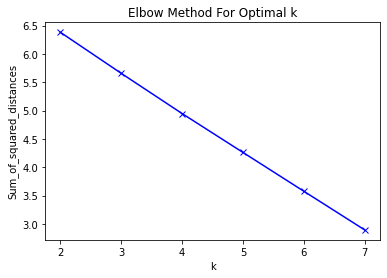

In [ ]:
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)
labels=model.labels_


In [ ]:
result={'content':resume["content"],'cluster':labels}
result=pd.DataFrame(result)
result.head(10)

,content,cluster
0,"ASHUTOSH SHUKLA \n\nAddress: A- 8 & 9, Sector ...",0
1,"PRADEEP JAMPANA \n\n#D4, APURVA ETHREAL, 6TH C...",0
2,Avinash P. Kambil\n\nCONTACT\n\nSKILLS\n\n218-...,2
3,• \n\n• \n\n• \n\n• \n\n• \n\n• \n\n• \n\nRenj...,2
4,"337 C W. North Avenue. ٭ Ada, Ohio 45810...",0
5, \n\n \n\n \n\n \n\n \n\n \n\n \n\nSande...,0
6,sachin.tayde1025@gmail.com \n\n \n\n \n\n \n...,0
7,\n \n\nRavindranath Nemani \n\n \n \nPhone: ...,0
8,\n\n \n\nEmail Id:shaikhsalamat09@gmail.com \...,0
9,Piyanshu Aggarwal \n\nPh: (Mob) +91 8335815554...,1


### Word Cloud

Cluster: 0


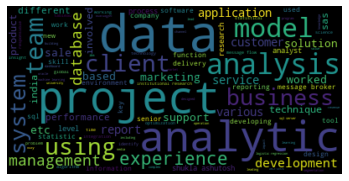

Cluster: 1


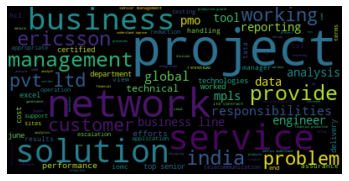

Cluster: 2


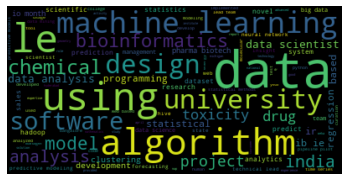

In [ ]:
for k in range(0,true_k):
    
    s=result[result.cluster==k]
    text=s['content'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    
    wordcloud = WordCloud(max_font_size=60, max_words=100).generate(text)
    
    print('Cluster: {}'.format(k))
    
    plt.figure()
    
    plt.imshow(wordcloud, interpolation="bilinear")
    
    plt.axis("off")
    
    plt.show()

# Defining accuracy and train_test_split

In [ ]:
#Checking the Accuracy of the Model
def accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred))

In [ ]:
#vectorizer = TfidfVectorizer(stop_words={'english'})
#X = vectorizer.fit_transform(resume["content"])

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(X,resume['content'],test_size=0.3, random_state=30,shuffle=True)

#Logistic Regression

In [ ]:
#fitting Logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

In [ ]:
#Checking the accuracy of logistic regression model
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Train Accuracy

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#MultinomialNB

In [ ]:
#fitting Multinomial-NB model
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

In [ ]:
#Checking accuracy of Multinomial-NB model
accuracy(y_train,y_train_pred,y_test,y_test_pred)

Streaming output truncated to the last 5000 lines.
o  Simmons, A., Minhas, O. & Ma, T. 2007 

 “Components in a Comprehensive System of Continuous Improvement”. Presented at 
the Alabama Association of institutional Research Conference, Huntsville, Alabama, 
April 2007.  

o  Simmons, A., Minhas, O. & Ma, T. 2007 

 “Components in a Comprehensive System of Continuous Improvement”. Presented at 
the Southern Association of Institutional Research Conference, Little Rock, AR, 
October 2007 

 
 
 

 

 

 

 

 

 

 

 
 
PROFESSIONAL 
MEMBERSHIP: 
 

o  Member, Association for Institutional Research, 2005-current (www.airweb.org) 
o  Member, Southern Association for Institutional Research, 2005-2008 (www.sair.org) 
o  Member, Alabama Association for Institutional Research, 2005-2008 (www.alair.org) 
o  Executive Member, Alabama Association for Institutional Research, 2008 

 

 

 

 

(www.alair.org) 

       1.00      1.00      1.00         1
                                        